In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Credit Score Classification Dataset.csv")

In [3]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [9]:
df.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

In [11]:
df.isna().any()

Age                   False
Gender                False
Income                False
Education             False
Marital Status        False
Number of Children    False
Home Ownership        False
Credit Score          False
dtype: bool

In [14]:
#statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [17]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [25]:
categories_col = df.select_dtypes(include="object").columns.tolist()

In [26]:
int_col = df.select_dtypes(include="int").columns.tolist()

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categories_col:
    #fit the label encoder to the categories data
    le.fit(df[i])
    #transform all the category columns into label encoded values
    df[i] = le.transform(df[i])

In [40]:
print(df['Credit Score'].value_counts())

1    113
0     36
2     15
Name: Credit Score, dtype: int64


In [43]:
#oversampling on 0 and 2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#define the SMOTE oversampling object
sm = SMOTE(random_state=42)
#fit the smote oversampling object on the train data
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

print("class ditribution before oversampling: ", y_train.value_counts())
print("class ditribution after oversampling: ", y_train_resampled.value_counts())

In [50]:
#modeling
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier()

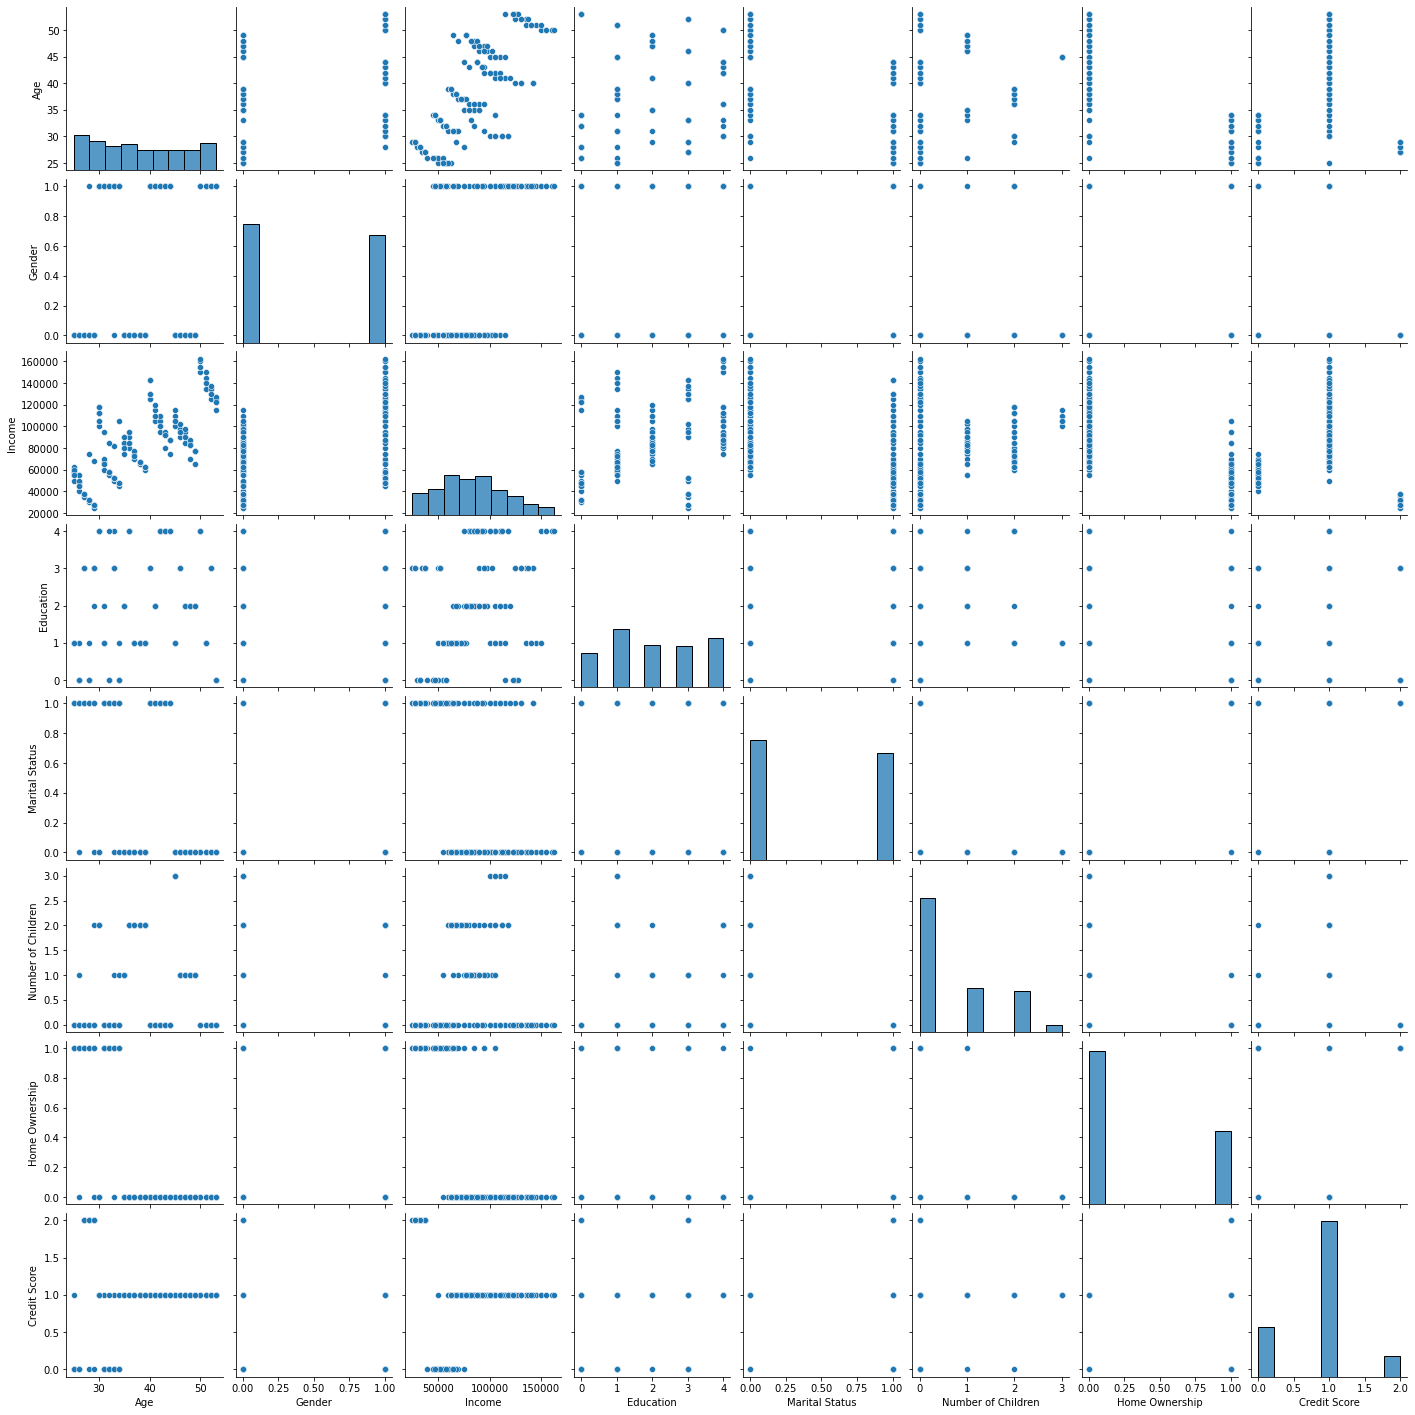

In [54]:
import seaborn as sns
sns.pairplot(df)

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [69]:
cross_val = cross_val_score(knn, x_train_resampled, y_train_resampled, cv=20)

In [71]:
print(cross_val)

[0.84615385 0.84615385 0.92307692 1.         0.92307692 0.92307692
 0.84615385 1.         1.         0.92307692 1.         0.92307692
 1.         1.         0.91666667 1.         1.         1.
 0.83333333 0.91666667]


In [72]:
preds = knn.predict(x_test)

In [73]:
print(preds)

[0 1 0 1 1 0 1 1 1 1 0 2 1 1 2 1 1 2 1 1 1 2 2 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 2 0]


In [74]:
print("Classification report: ", classification_report(y_test, preds))

Classification report:                precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00         6

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41

